# Importing the necessary libraries


In [75]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing the Dataset


In [2]:
data = pd.read_csv("http://bit.ly/w-data")
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


In [4]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [5]:
hours = np.array(data["Hours"]).reshape(-1,1)
scores = np.array(data["Scores"]).reshape(-1,1)

# Splitting The Data into Training and Test Sets

In [6]:
X_train, X_test, y_train, y_test = train_test_split(hours,scores, random_state = 0)

# Fit the training set 

In [54]:
no_of_neighbours = [1,2,3,4,5,6,7,8,9,10]

In [55]:
test_score = []
for i in no_of_neighbours:
    knnreg = KNeighborsRegressor(n_neighbors = i).fit(X_train, y_train)
    print("No.of Neighbours :"+str(i)+"    R-squared test score: {:.3f} ".format(knnreg.score(X_test, y_test)))
    test_score.append(knnreg.score(X_test, y_test))

No.of Neighbours :1    R-squared test score: 0.720 
No.of Neighbours :2    R-squared test score: 0.808 
No.of Neighbours :3    R-squared test score: 0.884 
No.of Neighbours :4    R-squared test score: 0.889 
No.of Neighbours :5    R-squared test score: 0.902 
No.of Neighbours :6    R-squared test score: 0.908 
No.of Neighbours :7    R-squared test score: 0.854 
No.of Neighbours :8    R-squared test score: 0.783 
No.of Neighbours :9    R-squared test score: 0.782 
No.of Neighbours :10    R-squared test score: 0.701 


In [56]:
training_score = []
for i in no_of_neighbours:
    knnreg = KNeighborsRegressor(n_neighbors = i).fit(X_train, y_train)
    print("No.of Neighbours :"+str(i)+"    R-squared test score: {:.3f} ".format(knnreg.score(X_train, y_train)))
    training_score.append(knnreg.score(X_train,y_train))

No.of Neighbours :1    R-squared test score: 0.998 
No.of Neighbours :2    R-squared test score: 0.976 
No.of Neighbours :3    R-squared test score: 0.960 
No.of Neighbours :4    R-squared test score: 0.951 
No.of Neighbours :5    R-squared test score: 0.931 
No.of Neighbours :6    R-squared test score: 0.942 
No.of Neighbours :7    R-squared test score: 0.937 
No.of Neighbours :8    R-squared test score: 0.912 
No.of Neighbours :9    R-squared test score: 0.889 
No.of Neighbours :10    R-squared test score: 0.854 


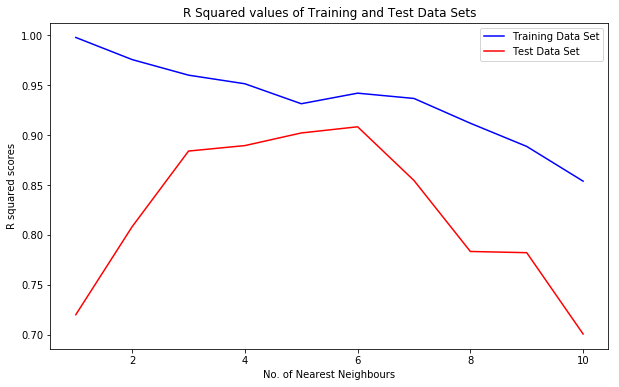

In [77]:
x = [1,2,3,4,5,6,7,8,9,10]
plt.plot(x,training_score,color="b",label="Training Data Set")
plt.plot(x,test_score,color="r",label="Test Data Set")
plt.legend(loc="upper right")
plt.xlabel("No. of Nearest Neighbours")
plt.ylabel("R squared scores")
plt.title("R Squared values of Training and Test Data Sets")
plt.rcParams["figure.figsize"] = (10,6)

AFTER COMPARING THE R-SQUARED SCORES, WE CHOOSE K = 6, TO AVOID OVERFITTING OR UNDERFITTING OF DATA

In [68]:
 knnreg = KNeighborsRegressor(n_neighbors = 6).fit(X_train, y_train)

# Comparing the Predicted and Actual Values

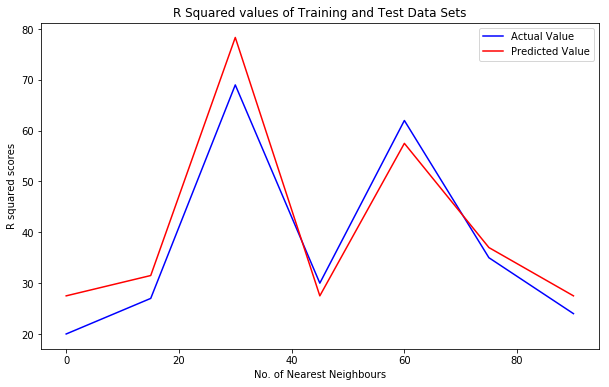

In [85]:
plt.plot(range(0,100,15),y_test,color="b",label="Actual Value")
plt.plot(range(0,100,15),knnreg.predict(X_test),color="r",label="Predicted Value")
plt.legend(loc="upper right")
plt.xlabel("No. of Nearest Neighbours")
plt.ylabel("R squared scores")
plt.title("R Squared values of Training and Test Data Sets")
plt.rcParams["figure.figsize"] = (10,6)
                             

In [89]:
knnreg.predict(9.25)

array([[85.]])